In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kin
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})

In [12]:
params = {
    'FWHM':5e-9, #ns
    't0': 20e-9,
    'FA': 0.41,
    'd':1e-5 #cm-2
}

I0 = 3e12 #Laser Fluence 


dt = .1e-9
t = np.arange(0,100e-9,dt)

k1 = 1.5e7
k2 = 6e-11 
# k3 = 1.6e-28
k3 = 0

Text(0,0.5,'P(t) $(mW/cm^2)$')

C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

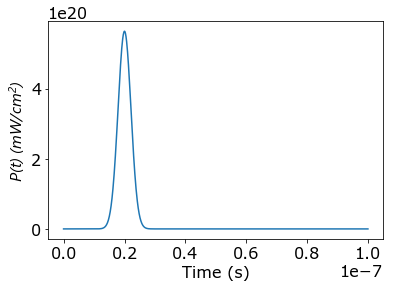

In [14]:
power, dng = kin.calc_pow(t,I0,params)

plt.plot(power)
plt.xlabel('Time (s)')
plt.ylabel('P(t) $(mW/cm^2)$')

Text(0.5,0,'time (s)')

C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

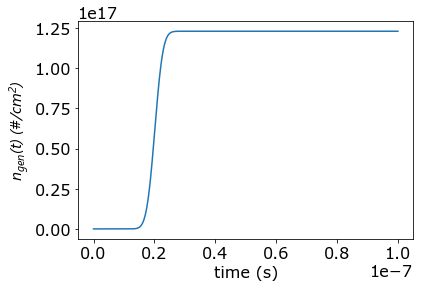

In [17]:
n0 = np.zeros(len(dng))

for i in range(len(dng)):
    n0[i] = np.trapz(dng.iloc[:i],dng.iloc[:i].index)
    
plt.plot(t,n0)
plt.ylabel('$n_{gen}(t) \ (\#/cm^2)$')
plt.xlabel('time (s)')

Text(0,0.5,'$n(t) \\ (\\#/cm^2)$')

C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

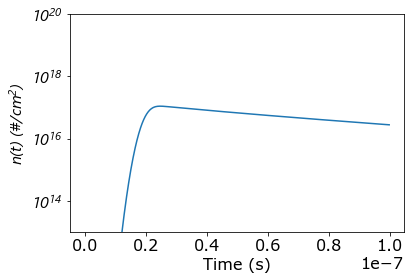

In [18]:
n = kin.calc_n(dng,k1,k2,k3)

plt.plot(n)
plt.yscale('log')
plt.ylim(1e13,1e20)
plt.xlabel('Time (s)')
plt.ylabel('$n(t) \ (\#/cm^2)$')

In [19]:
fluences = np.logspace(10,16, num=10)
# n_arr = np.empty(shape = (len(t),len(fluences)))
n_max = np.zeros(len(fluences))
n_0max = np.zeros(len(fluences))

for i, fluence in enumerate(fluences):
    print('calculating n for fluence: ', fluence)
    power,dng = kin.calc_pow(t,fluence,params)
    n = kin.calc_n(dng,k1,k2,k3)
    #n_arr[i] = n
    n_max[i] = n.max()
    n_0max[i] = np.trapz(dng,dng.index)

calculating n for fluence:  10000000000.0
calculating n for fluence:  46415888336.12772
calculating n for fluence:  215443469003.18866
calculating n for fluence:  1000000000000.0
calculating n for fluence:  4641588833612.772
calculating n for fluence:  21544346900318.777
calculating n for fluence:  100000000000000.0
calculating n for fluence:  464158883361277.25
calculating n for fluence:  2154434690031877.8
calculating n for fluence:  1e+16


Text(0.5,0,'Laser Fluence $(\\#/cm^2)$')

C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

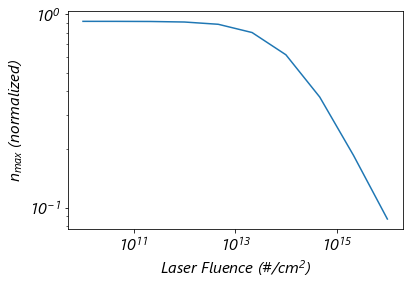

In [22]:
plt.plot(fluences, n_max/n_0max)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$n_{max}$ (normalized)')
plt.xlabel('Laser Fluence $(\#/cm^2)$')